## Amarcord Case Working Notebook

In [1]:
path = 'C:/users/mohdh/Documents/MSBA/Time Series/hbs_cases/amarcord_1/'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as datetime
np.set_printoptions(suppress=True)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12,6

import os, sys
sys.path.append('C:/users/mohdh/Documents/MSBA/python modules/')
import preprocessing
module_path = os.path.abspath(os.path.join('../../MSBA/time_series_20191113/modules/'))
if module_path not in sys.path:
    sys.path.append(module_path)
import testing
import boxcox
import grid
import build

In [3]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12,6

Note: `iloc[:,:]` added to get rid of empty cells read in.

In [4]:
monthly_data = pd.read_csv(path+'monthly_wires.csv').iloc[:12,:8]

In [5]:
monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,*,385.2,375.20,385.25,374.15,390.15
1,February,389.25,*,370.55,BB#e.?,362.15,371.25,371.25
2,March,394.20,414.2,341.44,373.55,373.55,401.45,369.40
3,April,419.00,425.25,416.21,414.19,413.75,99999999999,421.10
4,May,335.25,365.5,*,382.45,417.70,395.5,413.25
5,June,424.52,455.1,444.25,413.00,418.60,423.29,418.25
6,July,431.30,-123456789,457.5,381.00,421.20,441.45,423.55
7,August,494.50,474,460.18,494.20,465.48,483.25,486.75
8,September,374.27,410.2,423.91,413.25,444.91,>>>?robins,441.50
9,October,444.00,440.4,415.45,423.55,453.70,424.2,452.70


In [6]:
def clean_floats(x):
  try:
    if (type(x) != float):
      x = float(x)
      if (x < 0) | (x > 1000000):
        return None
      else:
        return x
    else:
      return float(x)
  except:
    return None

In [7]:
for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i] = monthly_data.iloc[:,i].apply(clean_floats)

In [8]:
monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,NaN,385.20,375.20,385.25,374.15,390.15
1,February,389.25,NaN,370.55,NaN,362.15,371.25,371.25
2,March,394.20,414.20,341.44,373.55,373.55,401.45,369.40
3,April,419.00,425.25,416.21,414.19,413.75,NaN,421.10
4,May,335.25,365.50,NaN,382.45,417.70,395.50,413.25
5,June,424.52,455.10,444.25,413.00,418.60,423.29,418.25
6,July,431.30,NaN,457.50,381.00,421.20,441.45,423.55
7,August,494.50,474.00,460.18,494.20,465.48,483.25,486.75
8,September,374.27,410.20,423.91,413.25,444.91,NaN,441.50
9,October,444.00,440.40,415.45,423.55,453.70,424.20,452.70


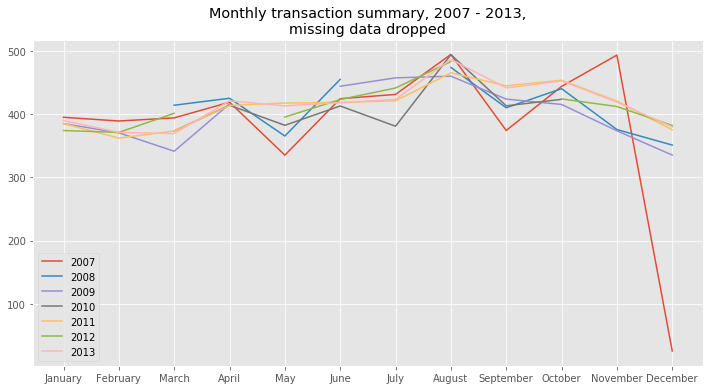

In [9]:
for i in range(1, len(monthly_data.columns)):
  lab = monthly_data.columns[i]
  plt.plot(monthly_data.iloc[:,0],monthly_data.iloc[:,i], label=lab)

plt.title('Monthly transaction summary, 2007 - 2013,\nmissing data dropped')
plt.legend()
plt.show()

In [10]:
for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i].fillna(monthly_data.iloc[:,i].mean(),
                                inplace=True)

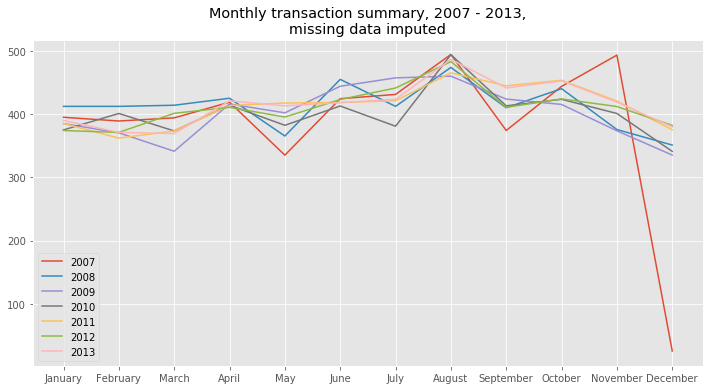

In [11]:
for i in range(1, len(monthly_data.columns)):
    lab = monthly_data.columns[i]
    plt.plot(monthly_data.iloc[:,0],monthly_data.iloc[:,i], label=lab)

plt.title('Monthly transaction summary, 2007 - 2013,\nmissing data imputed')
plt.legend()
plt.show()

### November 2010 Dataset

In [12]:
nov2010_data = pd.read_csv(path+'nov2010_wires.csv').iloc[:17940]

In [13]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return None

nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(convert_to_float)

In [14]:
def remove_negs(x):
  try:
    if x < 0:
      return None
    else:
      return x
  except:
    print('Closed on Sunday')

In [15]:
nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(remove_negs)

In [16]:
nov2010_data = preprocessing.extract_dt(nov2010_data,'Date of Transaction')

Total time elapsed: 0.05 seconds


In [17]:
import datetime as datetime

nov2010_data.drop(columns = 'hour', inplace=True)

nov2010_data['hour'] = pd.to_datetime(nov2010_data['Time of Transaction']).dt.hour.astype('int')

C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mohdh\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


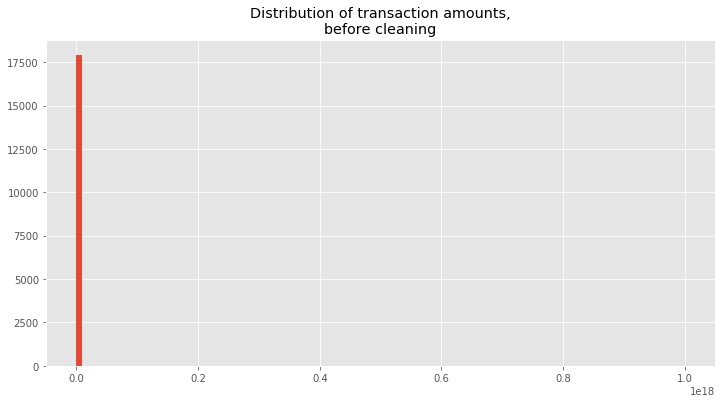

In [18]:
plt.hist(nov2010_data['Transaction Amount'],bins=100)

plt.title('Distribution of transaction amounts,\nbefore cleaning')
plt.show()

In [19]:
def remove_large(x):
  try:
    if x > 1000:
      return None
    else:
      return x
  except:
    print('Closed on Sunday')

In [20]:
nov2010_data['Transaction Amount'] = nov2010_data['Transaction Amount'].apply(remove_large)

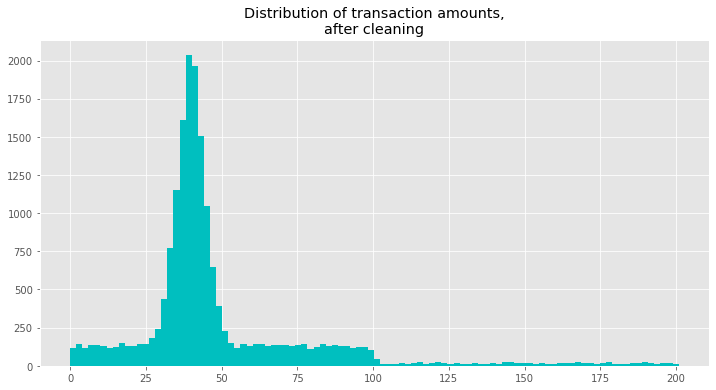

In [21]:
plt.hist(nov2010_data['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of transaction amounts,\nafter cleaning')
plt.show()

### Amarcord Part II

__Executive Summary__
> We chose to go with monthly and daily data.<br>Compared with hourly data, we were able to better fit out models to daily data.<br>Monthly data demonstrates a clear seasonal pattern, allowing us to fit seasonal models.<br>We recommend the Bank implement a monthly AML reviewal process for its clients, augmented by a bespoke forecasting model to help accelerate time-to-action.

## Data Cleansing

We were given new information about this particular business:
1. In December, 2007, a major store was flooded and was closed for renovation until March, 2008;
2. In August, 2010, a warehouse belonging to the customer under consideration was sold for $37,900 and the proceeds were deposited into the bank account.

To address (1), we will record Jan and Feb 2008 transactions as 0. For (2), we will reduce the monthly transaction amount by $37,900. This sale should be recognized as an asset sale rather than a business transaction (reflecting operational cash in-flow ).

Additionally, we impute missing values using the values from the previous date.

In [22]:
monthly_data = pd.read_csv(path+'monthly_wires.csv').iloc[:12,:8]

for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i] = monthly_data.iloc[:,i].apply(clean_floats)

monthly_data.iloc[:2,2] = 0
monthly_data.iloc[7,4] = monthly_data.iloc[7,4] - 37.9

for i in range(1, len(monthly_data.columns)):
    monthly_data.iloc[:,i].fillna(method='ffill', inplace=True)

monthly_data

,Month,2007,2008,2009,2010,2011,2012,2013
0,January,395.14,0.00,385.20,375.20,385.25,374.15,390.15
1,February,389.25,0.00,370.55,375.20,362.15,371.25,371.25
2,March,394.20,414.20,341.44,373.55,373.55,401.45,369.40
3,April,419.00,425.25,416.21,414.19,413.75,401.45,421.10
4,May,335.25,365.50,416.21,382.45,417.70,395.50,413.25
5,June,424.52,455.10,444.25,413.00,418.60,423.29,418.25
6,July,431.30,455.10,457.50,381.00,421.20,441.45,423.55
7,August,494.50,474.00,460.18,456.30,465.48,483.25,486.75
8,September,374.27,410.20,423.91,413.25,444.91,483.25,441.50
9,October,444.00,440.40,415.45,423.55,453.70,424.20,452.70


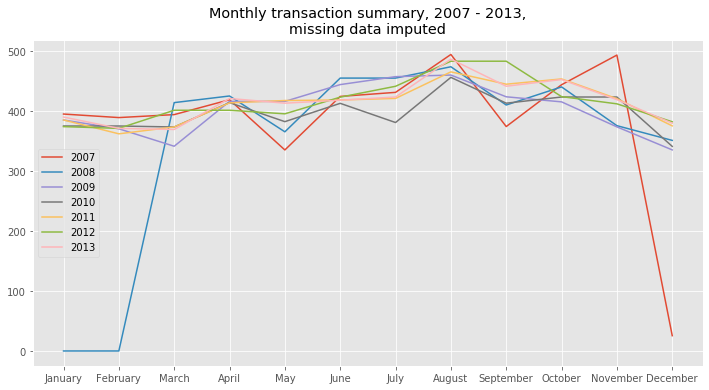

In [23]:
for i in range(1, len(monthly_data.columns)):
    lab = monthly_data.columns[i]
    plt.plot(monthly_data.iloc[:,0],monthly_data.iloc[:,i], label=lab)

plt.title('Monthly transaction summary, 2007 - 2013,\nmissing data imputed')
plt.legend()
plt.show()

Below, we convert the panel data above into a time series:

In [24]:
ls = []
for i in range(2007,2014):
    ls.extend(list(monthly_data[str(i)]))

In [25]:
ls_idx = []
s = '-'
for i in range(2007,2014):
    for j in range(1,13):
        if len(str(j)) < 2:
            j = '0' + str(j)
        else:
            j = str(j)
            
        ls_idx.append(s.join([str(i),j,'01']))

In [26]:
monthly_ts = pd.DataFrame(list(zip(ls_idx,ls)),
                          columns=['Date','Amount'],
                          index=None)

monthly_ts.reset_index(drop=True,inplace=True)
monthly_ts['Date'] = pd.to_datetime(monthly_ts['Date'])
monthly_ts = monthly_ts.set_index('Date')

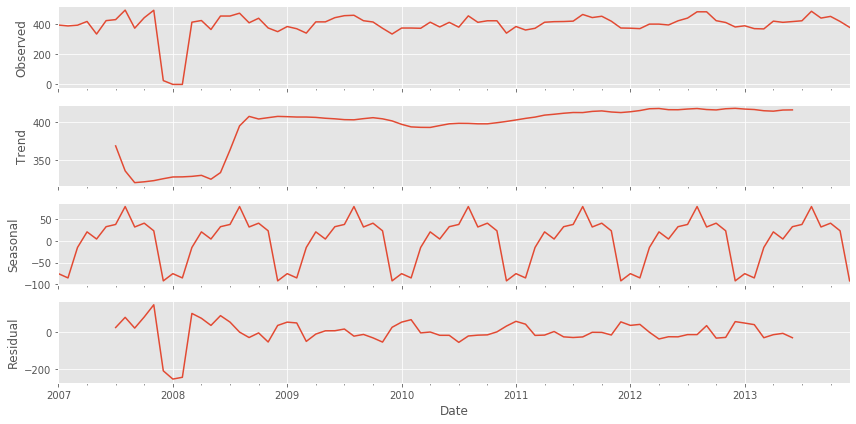

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(monthly_ts['Amount'], model='additive')
result.plot()

plt.show()

__Executive takeaway:__

> Monthly transactions for this client are seasonal. This is expected for most retail businesses (as is the case with this client).

#### November 2010 Transactions

In [28]:
nov2010_data = nov2010_data.sort_values(by=['day',
                                            'Time of Transaction']).reset_index(drop=True)

In [29]:
nov_out = nov2010_data[nov2010_data['Trans ID'].str.contains('OUTWT')].reset_index(drop=True)
nov_out['Date of Transaction'] = pd.to_datetime(nov_out['Date of Transaction'])
nov_out = nov_out.set_index('Date of Transaction')

In [30]:
nov_in = nov2010_data[nov2010_data['Trans ID'].str.contains('INCWT')].reset_index(drop=True)

In [31]:
nov_can = nov2010_data[nov2010_data['Trans ID'].str.contains('\$C')].reset_index(drop=True)

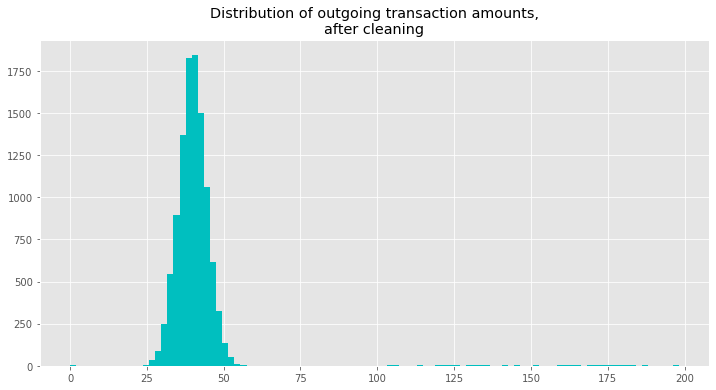

In [32]:
plt.hist(nov_out['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of outgoing transaction amounts,\nafter cleaning')
plt.show()

In [33]:
print('Records with missing data: ' + str(nov_out['Transaction Amount'].isna().sum()))
nov_out[nov_out['Transaction Amount'].isna()].head(5)

Records with missing data: 41


,Transaction Amount,Time of Transaction,Trans ID,year,month,day,weekday,hour
Date of Transaction,,,,,,,,
2010-11-01,NaN,1:02,KAJZIZHKUG8100OUTWTUJGBLU,2010,11,1,0,1
2010-11-01,NaN,1:03,WJUJDCHDMY7200OUTWTCBLHKA,2010,11,1,0,1
2010-11-01,NaN,1:03,NXAGKNTUNB7700OUTWTXXRMBX,2010,11,1,0,1
2010-11-01,NaN,1:03,UAGQEAIFCJ8200OUTWTQTIJBI,2010,11,1,0,1
2010-11-01,NaN,1:03,EYQZQGSONP6500OUTWTLKEFVG,2010,11,1,0,1


We then imput the NaN with the previous record's value.

In [34]:
nov_out['Transaction Amount'].fillna(method='ffill', inplace=True)

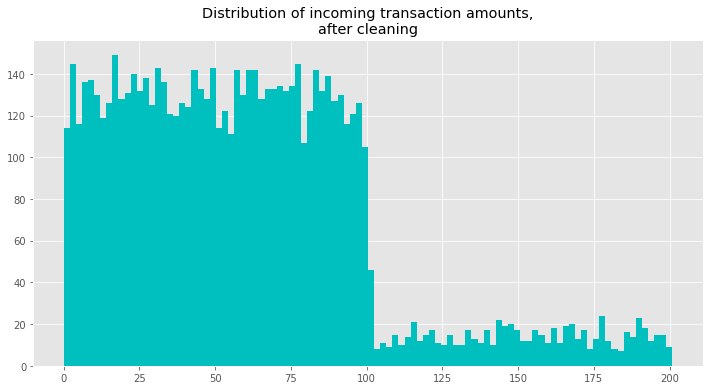

In [35]:
plt.hist(nov_in['Transaction Amount'],
         bins=100,
         color='c')

plt.title('Distribution of incoming transaction amounts,\nafter cleaning')
plt.show()

In [36]:
print('Records with missing data: ' + str(nov_in['Transaction Amount'].isna().sum()))
nov_in[nov_in['Transaction Amount'].isna()].reset_index(drop=True).head(5)

Records with missing data: 0


,Transaction Amount,Date of Transaction,Time of Transaction,Trans ID,year,month,day,weekday,hour


result = seasonal_decompose(nov_out['Transaction Amount'][1:], model='additive')
result.plot()

plt.show()

## Exploratory Data Analysis

In [37]:
'''
Args:
    data: pandas DataFrame type
    time = time intervals desired, defaults to daily intervals
    dataframe = if True, returns pd.DataFrame.groupby object as DataFrame.
                Default False
'''
def raw_plot(data, time = 'hour', dataframe = False):
    assert type(time) == str
    try:
        df = None
        if time == 'day':
            df = pd.DataFrame({'transaction_amount' : \
                               data.groupby('day')\
                               ['Transaction Amount'].sum()\
                              }\
                             ).reset_index()
        else:
            df = pd.DataFrame({'transaction_amount' : \
                               data.groupby(['day',
                                             'hour'])\
                               ['Transaction Amount'].sum()}\
                             )\
                             .reset_index()
        
        df['idx'] = list(df.index)
        
        lab = 'Hourly'
        if time != 'hour':
            lab = 'Daily'
        
        plt.plot(df['idx'],df['transaction_amount'])
        plt.title(lab + ' sum of transactions for Nov 2010')
        plt.show()
        
        if dataframe:
            return df
        
    except:
        print('Error in plotting')
        

### EDA Incoming Transactions

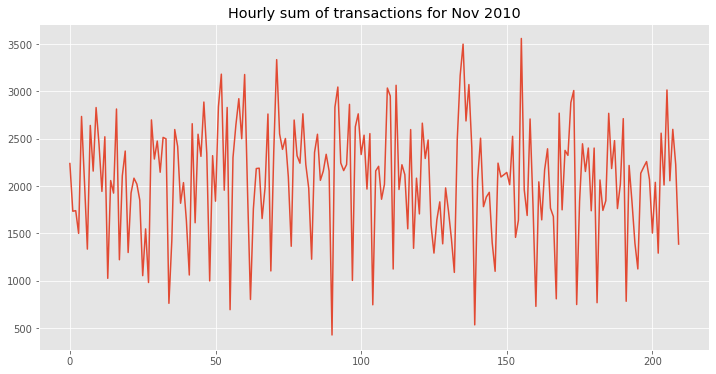

In [38]:
hourly_in = raw_plot(nov_in, time='hour', dataframe=True)

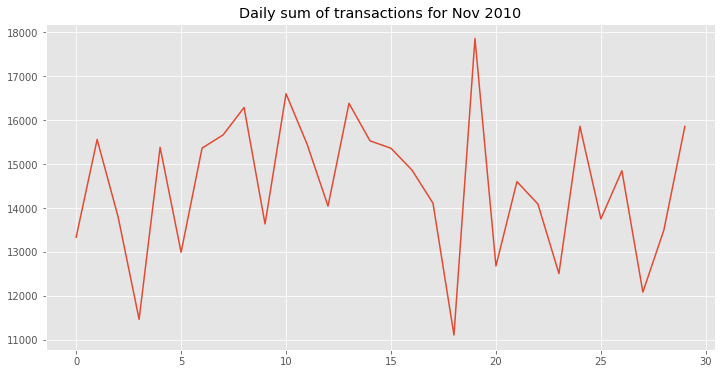

In [39]:
daily_in = raw_plot(nov_in, time='day', dataframe=True)

### EDA Outgoing Transactions

Below, we do some baseline exploratory analysis of the outgoing transactions:

First, the sum of outgoing transactions per hour is plotted. Notice the quiet periods where there are no transactions. This is inherent in the data.

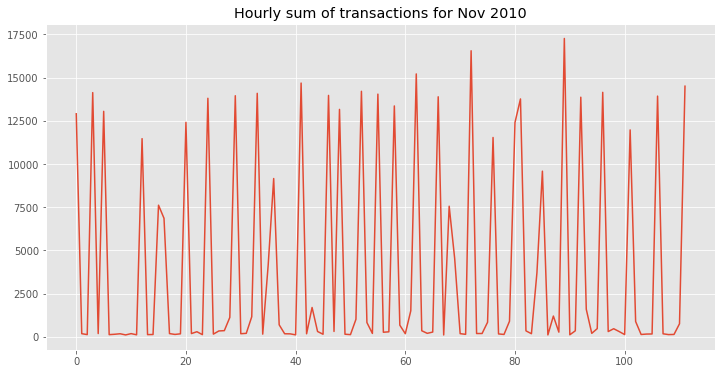

In [40]:
hourly_out = raw_plot(nov_out, time='hour', dataframe=True)

We can also look at outgoing transactions at a daily level. We do this by summing up all transactions for a single day throughout the month.

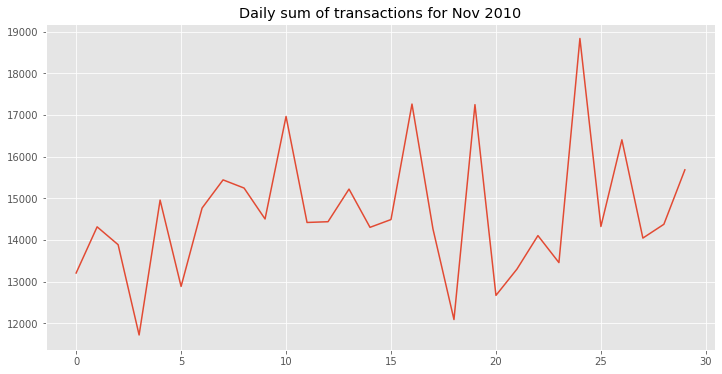

In [41]:
daily_out = raw_plot(nov_out, time='day', dataframe=True)

## Data Modeling

### 1. Monthly with Fourier Series

In [42]:
from sklearn.model_selection import train_test_split
'''
Adapted from Dan Trepanier
'''
X_f_m = []
for n,a in enumerate(monthly_ts.index):
    x = [1, n, np.sin(2 * n * np.pi / 12), np.cos(2 * n * np.pi / 12)]
    X_f_m +=[x]

y = list(monthly_ts['Amount'])

X_train, X_test, y_train, y_test = train_test_split(X_f_m,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=False)

In [43]:
import statsmodels.api as sm

reg = sm.OLS(y_train,
             X_train)
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     7.755
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           0.000174
Time:                        09:31:43   Log-Likelihood:                -386.30
No. Observations:                  67   AIC:                             780.6
Df Residuals:                      63   BIC:                             789.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        365.8347     19.273     18.982      0.000     327.321     404.348
x1             0.7675      0.504      1.524      0.133      -0.239       1.774
x2           -12.6417     13.908     -0.909      0.367     -40.434      15.150
x3           -60.3464     13.671     -4.414      0.000     -87.667     -33.026
==============================================================================
Omnibus:                       61.473   Durbin-Watson:                   1.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.047
Skew:                          -2.762   Prob(JB):                     1.93e-70
Kurtosis:                      12.192   Cond. No.                         75.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

ADF Statistic: -3.090099
p-value: 0.027295
Critical Values:
	1%: -3.546
	5%: -2.912
	10%: -2.594

We reject the Null Hypothesis (H0) -- the time series is stationary


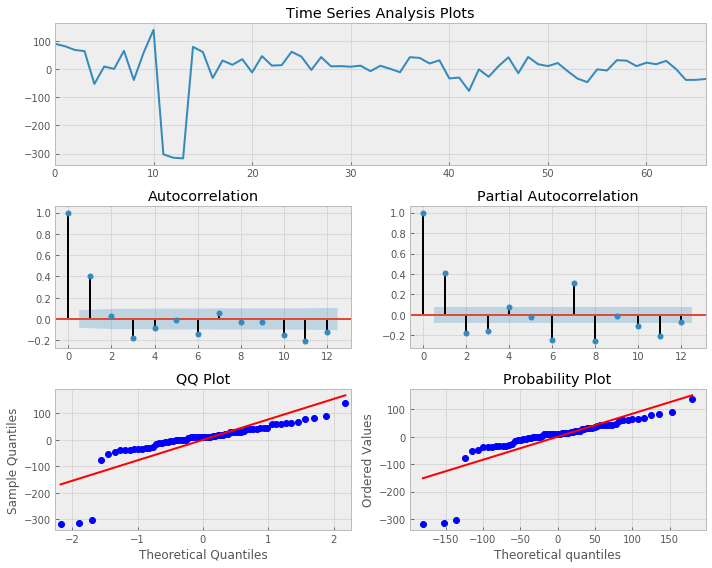

In [44]:
testing.ts_plot(results.resid, lags=12)

---------------
Monthly Incoming Transactions
Fourier Series
---------------


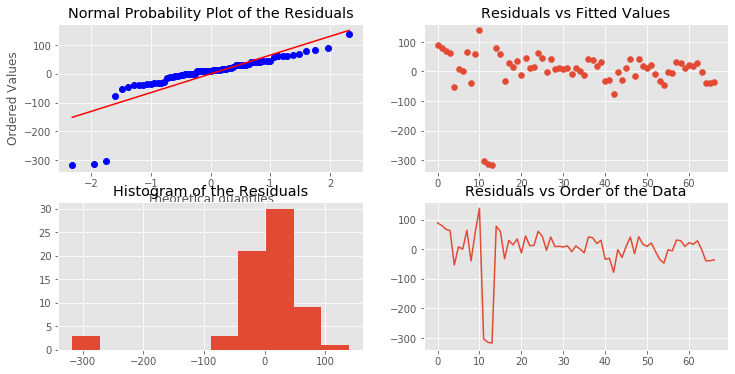

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.00064534 0.00289433 0.00302089 0.00598686 0.01293745 0.01369562
 0.02276777 0.03783992 0.05930863 0.05178158 0.02621656 0.02683859
 0.03023992 0.04456647 0.06318248 0.0812936  0.10793456 0.14060434
 0.17914182 0.22242396]
PROBLEM!  There appears to be information left in the residuals


True

In [45]:
N_in = list(range(len(y_train)))
y_hat = results.predict(X_train)

print('---------------\n%s\n---------------' % ('Monthly Incoming Transactions\nFourier Series'))
testing.eval_plot(N_in, y_train, y_hat)

In [46]:
perf_in = {}
perf_in['monthly_incoming'] = testing.measure_error(y_train, y_hat, label='Fourier Series Regressors')

+------------+---------------------------+
|   metric   |           value           |
+------------+---------------------------+
|   label    | Fourier Series Regressors |
|    RMSE    |     77.22684348467959     |
| RMSE_pcent |    0.19778607788793415    |
+------------+---------------------------+


In [47]:
range(len(y_test))

range(0, 17)

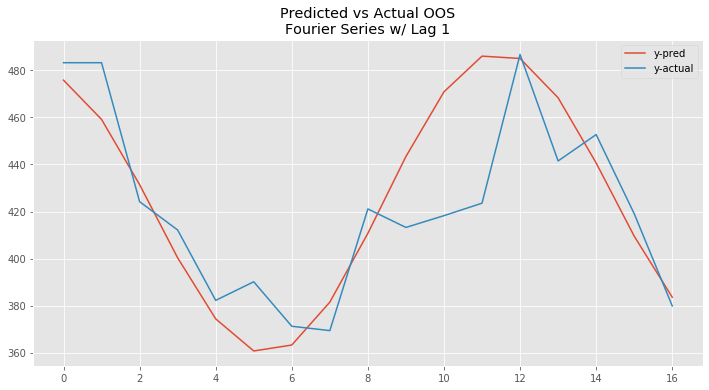

In [48]:
Y_pred = results.predict(X_test)

plt.plot(Y_pred, label = 'y-pred')
plt.plot(range(len(y_test)), y_test, label = 'y-actual')
plt.title('Predicted vs Actual OOS\nFourier Series w/ Lag 1')
plt.legend()
plt.show()

In [49]:
perf_out = {}
perf_out['monthly_incoming'] = testing.measure_error(y_test, Y_pred, label='Fourier Series OOS Regressors')

+------------+-------------------------------+
|   metric   |             value             |
+------------+-------------------------------+
|   label    | Fourier Series OOS Regressors |
|    RMSE    |       25.00411691270539       |
| RMSE_pcent |       0.0592679848739531      |
+------------+-------------------------------+


#### 1.1 Monthly OLS with Fourier Series, L_1

In [50]:
X_f_m = []
for n,a in enumerate(monthly_ts.index):
    x = [1, n, np.sin(2 * n * np.pi / 12), np.cos(2 * n * np.pi / 12)]
    X_f_m +=[x]

X = pd.DataFrame(X_f_m,columns=['Const', 'Idx', 'Sin', 'Cos'])
X['L_1'] = pd.DataFrame(y).shift(1)

In [51]:
y = list(monthly_ts['Amount'])

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=False)

In [52]:
import statsmodels.api as sm # Time Series Analysis

reg = sm.OLS(y_train[1:],
             X_train[1:])
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     10.48
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           1.59e-06
Time:                        09:31:47   Log-Likelihood:                -374.14
No. Observations:                  66   AIC:                             758.3
Df Residuals:                      61   BIC:                             769.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const        211.5276     45.814      4.617      0.000     119.916     303.139
Idx            0.5584      0.481      1.162      0.250      -0.402       1.519
Sin            4.5708     13.616      0.336      0.738     -22.655      31.797
Cos          -43.9395     13.802     -3.184      0.002     -71.538     -16.341
L_1            0.4086      0.116      3.536      0.001       0.178       0.640
==============================================================================
Omnibus:                       49.438   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.550
Skew:                          -1.957   Prob(JB):                     4.47e-67
Kurtosis:                      12.788   Cond. No.                     2.07e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ADF Statistic: -4.456905
p-value: 0.000235
Critical Values:
	1%: -3.544
	5%: -2.911
	10%: -2.593

We reject the Null Hypothesis (H0) -- the time series is stationary


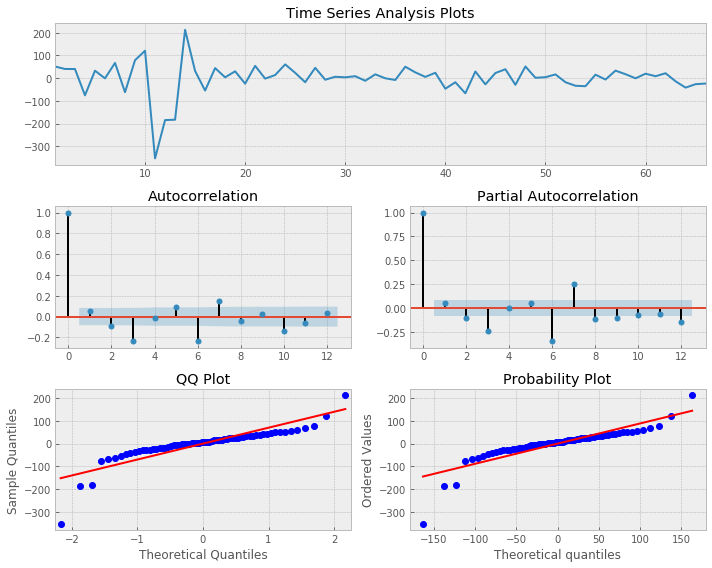

In [53]:
testing.ts_plot(results.resid, lags=12)

---------------
Monthly Incoming Transactions
Fourier Series, Lag 1
---------------


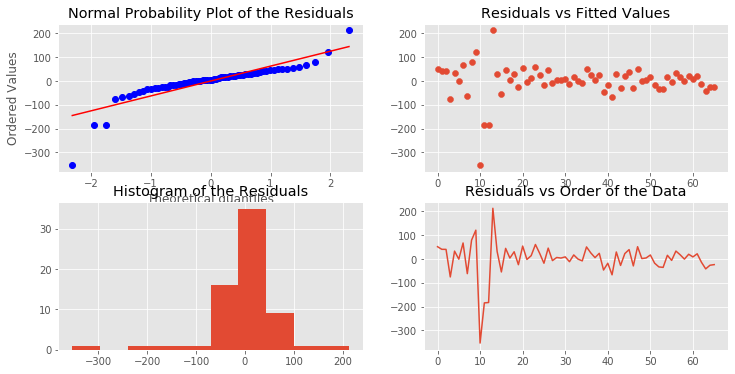

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.64913872 0.67206423 0.19054381 0.31260859 0.37733417 0.15780164
 0.14010677 0.19602196 0.26446834 0.24070378 0.2927711  0.36158881
 0.43311028 0.51042061 0.58643848 0.64384973 0.70875859 0.76652289
 0.81646539 0.85644337]
There does not appear to be information left in the residuals


False

In [54]:
N_in = list(range(len(y_train[1:])))
y_hat = results.predict(X_train[1:])

print('---------------\n%s\n---------------' % ('Monthly Incoming Transactions\nFourier Series, Lag 1'))
testing.eval_plot(N_in, y_train[1:], y_hat)

In [55]:
perf_in['monthly_incoming_L1'] = testing.measure_error(y_train[1:], y_hat, label='Fourier Series L_1 Regressors')

+------------+-------------------------------+
|   metric   |             value             |
+------------+-------------------------------+
|   label    | Fourier Series L_1 Regressors |
|    RMSE    |        70.0991725524753       |
| RMSE_pcent |      0.17956399690683988      |
+------------+-------------------------------+


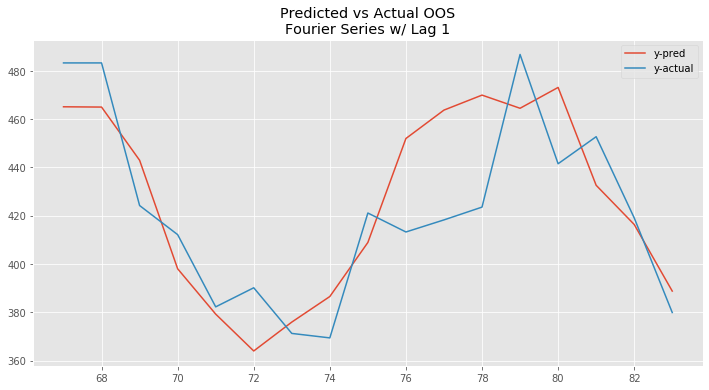

In [56]:
Y_pred = results.predict(X_test)

plt.plot(Y_pred, label = 'y-pred')
plt.plot(np.array(Y_pred.index), y_test, label = 'y-actual')
plt.title('Predicted vs Actual OOS\nFourier Series w/ Lag 1')
plt.legend()
plt.show()

In [57]:
perf_out['monthly_incoming_L1'] = testing.measure_error(y_test, Y_pred, label='Fourier Series L_1 OOS Regressors')

+------------+-----------------------------------+
|   metric   |               value               |
+------------+-----------------------------------+
|   label    | Fourier Series L_1 OOS Regressors |
|    RMSE    |         24.34386967777511         |
| RMSE_pcent |        0.057702981667899736       |
+------------+-----------------------------------+


__Executive Takeaway__
> Monthly transaction totals can be predicted quite accurately using a linear model after accounting for seasonality and prior month's values.

#### 1.2 Monthly OLS with Fourier Series, {L_1, L_3, L_6, L_12}

In [101]:
X_f_m = []
for n,a in enumerate(monthly_ts.index):
    x = [1, n, np.sin(2 * n * np.pi / 12), np.cos(2 * n * np.pi / 12)]
    X_f_m +=[x]

X = pd.DataFrame(X_f_m,columns=['Const', 'Idx', 'Sin', 'Cos'])
X['L_1'] = pd.DataFrame(y).shift(1)
X['L_3'] = pd.DataFrame(y).shift(3)
X['L_6'] = pd.DataFrame(y).shift(6)
X['L_12'] = pd.DataFrame(y).shift(12)

In [102]:
y = list(monthly_ts['Amount'])

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle=False)

In [103]:
import statsmodels.api as sm # Time Series Analysis

reg = sm.OLS(y_train[12:],
             X_train.iloc[12:,[0,1,4,5,6,7]])
results = reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     23.31
Date:                Mon, 18 Nov 2019   Prob (F-statistic):           6.62e-12
Time:                        09:36:09   Log-Likelihood:                -287.86
No. Observations:                  55   AIC:                             587.7
Df Residuals:                      49   BIC:                             599.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Const        337.0741     61.917      5.444      0.000     212.648     461.500
Idx            1.1085      0.493      2.249      0.029       0.118       2.099
L_1            0.5794      0.076      7.671      0.000       0.428       0.731
L_3           -0.2858      0.070     -4.068      0.000      -0.427      -0.145
L_6           -0.2485      0.077     -3.218      0.002      -0.404      -0.093
L_12          -0.0111      0.073     -0.153      0.879      -0.157       0.135
==============================================================================
Omnibus:                        9.816   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               20.218
Skew:                           0.330   Prob(JB):                     4.07e-05
Kurtosis:                       5.896   Cond. No.                     7.43e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

ADF Statistic: -2.978939
p-value: 0.036909
Critical Values:
	1%: -3.563
	5%: -2.919
	10%: -2.597

We reject the Null Hypothesis (H0) -- the time series is stationary


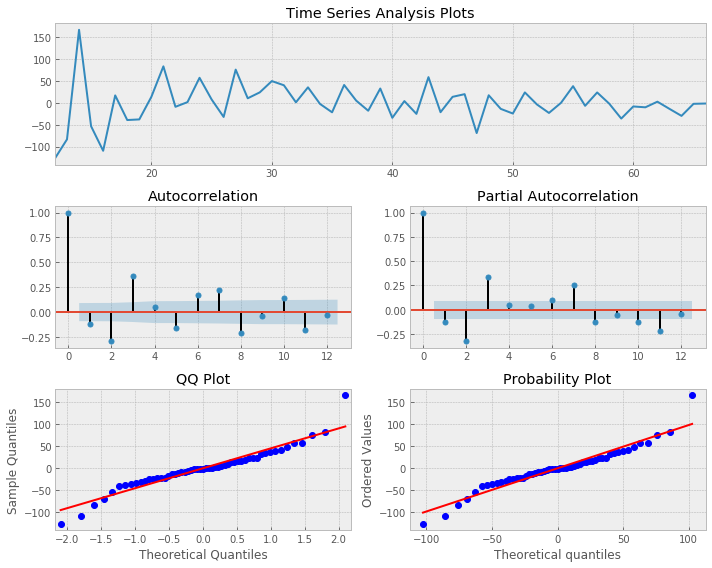

In [104]:
testing.ts_plot(results.resid, lags=12)

---------------
Monthly Incoming Transactions
Fourier Series, Lag 12
---------------


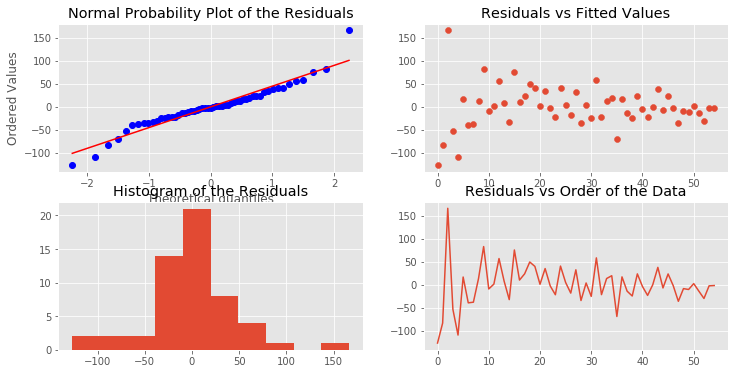

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.3632457  0.05339493 0.00292701 0.00680609 0.0073848  0.00698452
 0.00392235 0.00243303 0.00437535 0.00473295 0.00355642 0.00590172
 0.008923   0.01175019 0.01513919 0.02122134 0.02224587 0.02716088
 0.03535225 0.02866702]
PROBLEM!  There appears to be information left in the residuals


True

In [107]:
N_in = list(range(len(y_train[12:])))
y_hat = results.predict(X_train.iloc[12:,[0,1,4,5,6,7]])

print('---------------\n%s\n---------------' % ('Monthly Incoming Transactions\nFourier Series, Lag 12'))
testing.eval_plot(N_in, y_train[12:], y_hat)

In [108]:
perf_in['monthly_incoming_L12'] = testing.measure_error(y_train[12:], y_hat, label='Fourier Series L_12 Regressors')

+------------+--------------------------------+
|   metric   |             value              |
+------------+--------------------------------+
|   label    | Fourier Series L_12 Regressors |
|    RMSE    |       45.37513100321039        |
| RMSE_pcent |      0.11585955553589788       |
+------------+--------------------------------+


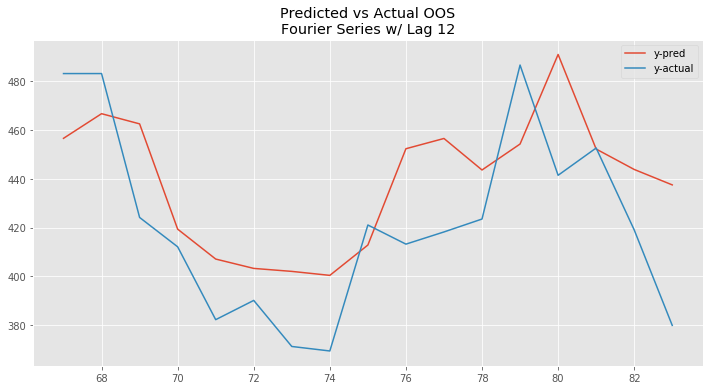

In [115]:
Y_pred = results.predict(X_test.iloc[:,[0,1,4,5,6,7]])

plt.plot(Y_pred, label = 'y-pred')
plt.plot(np.array(Y_pred.index), y_test, label = 'y-actual')
plt.title('Predicted vs Actual OOS\nFourier Series w/ Lag 12')
plt.legend()
plt.show()

In [116]:
perf_out['monthly_incoming_L12'] = testing.measure_error(y_test, Y_pred, label='Fourier Series L_12 OOS Regressors')

+------------+------------------------------------+
|   metric   |               value                |
+------------+------------------------------------+
|   label    | Fourier Series L_12 OOS Regressors |
|    RMSE    |         30.80855464044328          |
| RMSE_pcent |        0.07302641228214386         |
+------------+------------------------------------+


### 2.0 Holt-Winters

We will now use a seasonal Holt-Winters model to model daily transactions

#### 2.1 Holt-Winters Model - Daily Incoming

In [66]:
y = list(daily_in['transaction_amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [67]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw = ExponentialSmoothing(np.array(y_train),trend='multiplicative',seasonal='mul',seasonal_periods=7)
fit_hw = hw.fit()

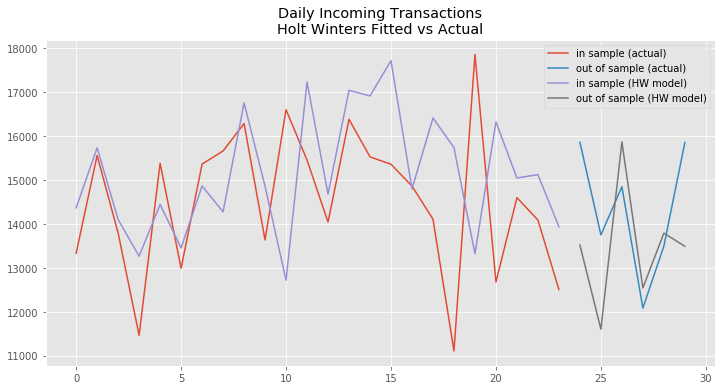

In [68]:
'''
Code adapted from Dan Trepanier, lecture 5.0 Smoothing
'''

IND = {'in':list(range(len(y_train))), 'out': len(y_train) + np.arange(len(y_test))}

HW = {'in': list(fit_hw.fittedvalues),
      'out': list(fit_hw.forecast(len(y_test)))}

plt.plot(IND['in'], y_train, label='in sample (actual)')
plt.plot(IND['out'], y_test, label='out of sample (actual)')

plt.plot(IND['in'], HW['in'], label='in sample (HW model)')
plt.plot(IND['out'], HW['out'], label='out of sample (HW model)')

plt.legend()
plt.title('Daily Incoming Transactions\nHolt Winters Fitted vs Actual')
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error
import statistics
import math

rmse1_in = math.sqrt(mean_squared_error(y_train, HW['in']))
rmse1_in_pct = rmse1_in / statistics.mean(y_train)

rmse1_out = math.sqrt(mean_squared_error(y_test, HW['out']))
rmse1_out_pct = rmse1_out / statistics.mean(y_test)

#### 2.2 Holt-Winters Model - Daily Outgoing

In [70]:
y = list(daily_out['transaction_amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [71]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

hw = ExponentialSmoothing(np.array(y_train),trend='multiplicative',seasonal='mul',seasonal_periods=7)
fit_hw = hw.fit()

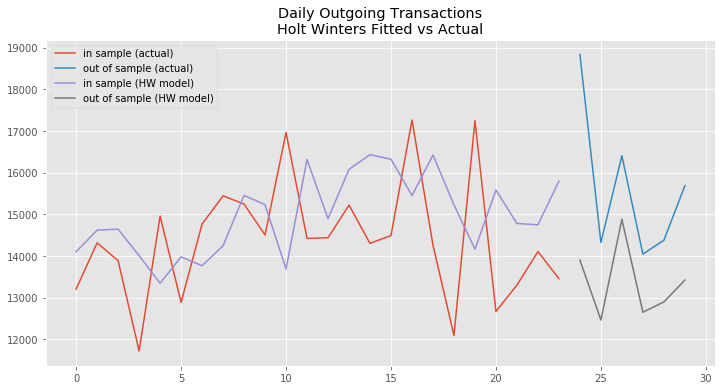

In [72]:
'''
Code adapted from Dan Trepanier, lecture 5.0 Smoothing
'''

IND = {'in':list(range(len(y_train))), 'out': len(y_train) + np.arange(len(y_test))}

HW = {'in': list(fit_hw.fittedvalues),
      'out': list(fit_hw.forecast(len(y_test)))}

plt.plot(IND['in'], y_train, label='in sample (actual)')
plt.plot(IND['out'], y_test, label='out of sample (actual)')

plt.plot(IND['in'], HW['in'], label='in sample (HW model)')
plt.plot(IND['out'], HW['out'], label='out of sample (HW model)')

plt.legend()
plt.title('Daily Outgoing Transactions\nHolt Winters Fitted vs Actual')
plt.show()

In [73]:
from sklearn.metrics import mean_squared_error
import statistics
import math

rmse1_in = math.sqrt(mean_squared_error(y_train, HW['in']))
rmse1_in_pct = rmse1_in / statistics.mean(y_train)

rmse1_out = math.sqrt(mean_squared_error(y_test, HW['out']))
rmse1_out_pct = rmse1_out / statistics.mean(y_test)

In [74]:
rmse1_in_pct, rmse1_out_pct

(0.12733104523345162, 0.1640910093065182)

#### 2.3 Holt-Winters Model - Monthly Incoming

Sampling       :  67 / 84
Box Cox lambda : 2.2053327238609772


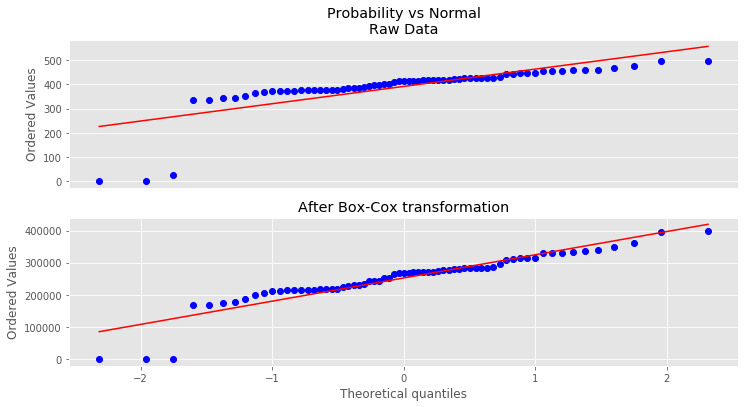


Box Cox Transform lambda : 2.205333
+---------+-------------------+-------------------+---------------------+
|   data  |        mean       |       st_dev      |     std to mean     |
+---------+-------------------+-------------------+---------------------+
|   Raw   | 391.4564179104479 | 90.36839449985857 | 0.23085173818897978 |
| Box Cox | 252319.0239336945 | 75137.51926241744 |  0.2977877691939804 |
+---------+-------------------+-------------------+---------------------+


In [75]:
bc = boxcox.BoxCox(monthly_ts['Amount'] + 1, test_size=.2)  # 20% since training 80% of data
bc.plot()

In [76]:
y = list(monthly_ts['Amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [77]:
y_train = bc.Y
y_test = bc.get_test()

In [78]:
hw = ExponentialSmoothing(np.array(y_train),trend='additive',seasonal='add',seasonal_periods=12)
fit_hw = hw.fit()

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


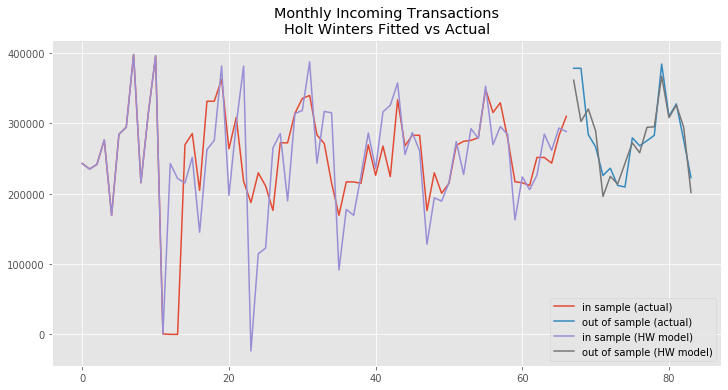

In [79]:
'''
Code adapted from Dan Trepanier, lecture 5.0 Smoothing
'''

IND = {'in':list(range(len(y_train))), 'out': len(y_train) + np.arange(len(y_test))}

HW = {'in': list(fit_hw.fittedvalues),
      'out': list(fit_hw.forecast(len(y_test)))}

plt.plot(IND['in'], y_train, label='in sample (actual)')
plt.plot(IND['out'], y_test, label='out of sample (actual)')

plt.plot(IND['in'], HW['in'], label='in sample (HW model)')
plt.plot(IND['out'], HW['out'], label='out of sample (HW model)')

plt.legend()
plt.title('Monthly Incoming Transactions\nHolt Winters Fitted vs Actual')
plt.show()

In [80]:
rmse_HW_m_in = math.sqrt(mean_squared_error(y_train, HW['in']))
rmse_HW_m_in_pct = rmse_HW_m_in / statistics.mean(y_train)

rmse_HW_m_out = math.sqrt(mean_squared_error(y_test, HW['out']))
rmse_HW_m_out_pct = rmse_HW_m_out / statistics.mean(y_test)

In [81]:
perf_in['HW_monthly_incoming'] = {'RMSE':rmse_HW_m_in,
                                  'RMSE_pcent':rmse_HW_m_in_pct,
                                  'label':'Holt-Winters Monthly'}

perf_out['HW_monthly_incoming'] = {'RMSE':rmse_HW_m_out,
                                  'RMSE_pcent':rmse_HW_m_out_pct,
                                  'label':'Holt-Winters Monthly'}

### 3.0 SARIMA model - Monthly transactions

We first perform a grid search using the `auto_arima()` function form the `pmdarima` package. More info on this package [here](https://pypi.org/project/pmdarima/).

In [82]:
y = list(monthly_ts['Amount'])

y_train, y_test = train_test_split(y,
                                   test_size=0.2,
                                   random_state=42,
                                   shuffle=False)

In [83]:
from pmdarima.arima import auto_arima

sarima_model = auto_arima(y_train,
                           start_p=1,
                           start_q=1,
                           max_p=5,
                           max_q=5,
                           start_P=0,
                           start_Q=0,
                           max_P=3,
                           max_Q=3,
                           m=12, 
                           seasonal=True,
                           trace=True,
                           d=1,
                           D=1,
                           error_action='warn',
                           suppress_warnings=True,
                           random_state = 42,
                           n_fits=30
                         )

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=659.747, BIC=667.702, Fit time=0.367 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=662.470, BIC=666.448, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=653.861, BIC=661.817, Fit time=0.475 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=650.954, BIC=658.910, Fit time=0.386 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=652.718, BIC=662.663, Fit time=0.968 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=663.457, BIC=669.424, Fit time=0.184 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=643.590, BIC=653.535, Fit time=0.983 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=651.347, BIC=659.303, Fit time=0.601 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=644.128, BIC=656.062, Fit time=1.351 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=649.769, BIC=655.736, Fit time=0.583 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=644.627, BIC=658.550, Fit time=1.264 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=645.012, BIC=656.946, Fit time=1.117 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=643.299, BIC=655.233, Fit time=1.511 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=651.221, BIC=661.166, Fit time=0.815 seconds
Fit ARIMA: order=(3, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=646.170, BIC=662.082, Fit time=1.540 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=644.477, BIC=658.400, Fit time=1.119 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=660.417, BIC=670.362, Fit time=0.534 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds


C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
C:\Users\mohdh\Anaconda3\lib\site-packages\pmdarima\arima\_auto_solvers.py:211: ModelFitWarning: Unable to fit ARIMA for order=(2, 1, 1) seasonal_order=(1, 1, 2, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)


Fit ARIMA: order=(3, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=644.892, BIC=658.815, Fit time=1.619 seconds
Total fit time: 15.486 seconds


In [84]:
sarima_model.order, sarima_model.seasonal_order

((2, 1, 1), (0, 1, 1, 12))

The grid search has specified an ARIMA (2,1,1)x(0,1,1,12) to be the optimal hyperparameters for our dataset.

In [85]:
model_specs = 'SARIMA(2,1,1)x(0,1,1,12)'
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   67
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -315.650
Date:                            Mon, 18 Nov 2019   AIC                            643.299
Time:                                    09:32:11   BIC                            655.233
Sample:                                         0   HQIC                           647.901
                                             - 67                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1108      1.301      0.085      0.932      -2.440       2.661
ar.L1          0.6241      0.263      2.371      0.018       0.108       1.140
ar.L2         -0.2076      0.202     -1.028      0.304      -0.603       0.188
ma.L1         -0.9998     87.629     -0.011      0.991    -172.749     170.750
ma.S.L12      -0.9870      8.482     -0.116      0.907     -17.612      15.638
sigma2      4486.7561   4.02e+05      0.011      0.991   -7.83e+05    7.92e+05
===================================================================================
Ljung-Box (Q):                       33.39   Jarque-Bera (JB):                81.24
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             1.76
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

First we fit the model on the training data

In [86]:
sarima_model.fit(y_train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(2, 1, 1),
      out_of_sample_size=0, scoring='mse', scoring_args=None,
      seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
      suppress_warnings=True, transparams=True, trend=None,
      with_intercept=True)

In [87]:
sarima = sm.tsa.statespace.SARIMAX

model = sarima(y_train, order=(2,1,1), seasonal_order=(0,0,1,12))
f = model.fit()
y_raw = f.fittedvalues

C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\mohdh\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


---------------
Monthly Data
In Sample
SARIMA(2,1,1)x(0,1,1,12)
---------------


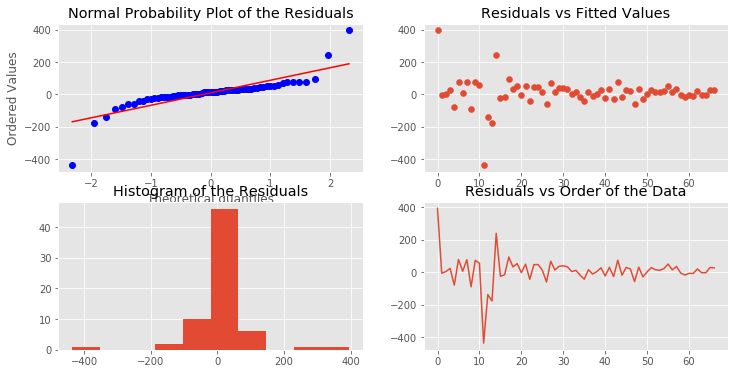

Ljung-Box Test
H_0 (p>0.05) --> The data are independently distributed -- i.e. there's no auto correlations
H_a (p<0.05) --> The data are not independently distributed -- i.e. there is auto correlations
p_values [0.83478177 0.8914263  0.81493563 0.88179951 0.89564387 0.45131388
 0.40219368 0.31569974 0.30805325 0.39344133 0.10151934 0.09958264
 0.08518694 0.04671933 0.06628823 0.08256156 0.11050344 0.14421472
 0.18216264 0.22046732]
PROBLEM!  There appears to be information left in the residuals
+------------+--------------------------+
|   metric   |          value           |
+------------+--------------------------+
|   label    | SARIMA(2,1,1)x(0,1,1,12) |
|    RMSE    |    90.80042940295407     |
| RMSE_pcent |   0.23254946067701565    |
+------------+--------------------------+


In [88]:
print('---------------\n%s\n---------------' % ('Monthly Data\nIn Sample\n%s' % model_specs))
N_in = list(range(len(y_train)))
testing.eval_plot(N_in, y_train, y_raw)
perf_in[model_specs] = testing.measure_error(y_train, y_raw, label=model_specs)

Then we forecast the testing dataset

In [89]:
future_forecast, conf_int = sarima_model.predict(n_periods=len(y_test), return_conf_int=True)
future_forecast = pd.DataFrame(future_forecast,index = monthly_ts.index[len(y_train):],columns=['Prediction'])

In [90]:
future_forecast['Actual'] = y_test

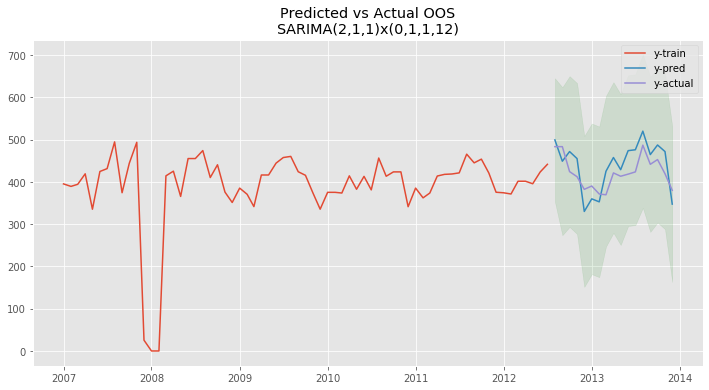

In [91]:
plt.plot(np.array(monthly_ts.index[:len(y_train)]), y_train, label = 'y-train')
plt.plot(future_forecast['Prediction'], label = 'y-pred')
plt.plot(np.array(future_forecast.index), future_forecast['Actual'], label = 'y-actual')
plt.fill_between(np.array(future_forecast.index),
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='g')
plt.title('Predicted vs Actual OOS\n%s' % model_specs)
plt.legend()
plt.show()

In [92]:
perf_out[model_specs] = testing.measure_error(y_test, np.array(future_forecast['Prediction']), label=model_specs)

+------------+--------------------------+
|   metric   |          value           |
+------------+--------------------------+
|   label    | SARIMA(2,1,1)x(0,1,1,12) |
|    RMSE    |    39.59118656026358     |
| RMSE_pcent |   0.09384413992254334    |
+------------+--------------------------+


### T.B.O.Y.

In [93]:
pd.DataFrame(perf_in)

,monthly_incoming,monthly_incoming_L1,monthly_incoming_L12,HW_monthly_incoming,"SARIMA(2,1,1)x(0,1,1,12)"
label,Fourier Series Regressors,Fourier Series L_1 Regressors,Fourier Series L_12 Regressors,Holt-Winters Monthly,"SARIMA(2,1,1)x(0,1,1,12)"
RMSE,77.2268,70.0992,44.5623,65972.8,90.8004
RMSE_pcent,0.197786,0.179564,0.113784,0.261466,0.232549


In [94]:
pd.DataFrame(perf_out)

,monthly_incoming,monthly_incoming_L1,monthly_incoming_L12,HW_monthly_incoming,"SARIMA(2,1,1)x(0,1,1,12)"
label,Fourier Series OOS Regressors,Fourier Series L_1 OOS Regressors,Fourier Series L_12 OOS Regressors,Holt-Winters Monthly,"SARIMA(2,1,1)x(0,1,1,12)"
RMSE,25.0041,24.3439,31.671,26307.1,39.5912
RMSE_pcent,0.059268,0.057703,0.0750707,0.0927935,0.0938441


In [95]:
# Assign in and out of sample RMSE from dictionaries created.
rmse1_in = perf_in['monthly_incoming']['RMSE_pcent']
rmse2_in = perf_in['monthly_incoming_L1']['RMSE_pcent']
rmse3_in = perf_in['monthly_incoming_L12']['RMSE_pcent']
rmse4_in = perf_in['HW_monthly_incoming']['RMSE_pcent']
rmse5_in = perf_in['SARIMA(2,1,1)x(0,1,1,12)']['RMSE_pcent']
rmse1_out = perf_out['monthly_incoming']['RMSE_pcent']
rmse2_out = perf_out['monthly_incoming_L1']['RMSE_pcent']
rmse3_out = perf_out['monthly_incoming_L12']['RMSE_pcent']
rmse4_out = perf_out['HW_monthly_incoming']['RMSE_pcent']
rmse5_out = perf_out['SARIMA(2,1,1)x(0,1,1,12)']['RMSE_pcent']

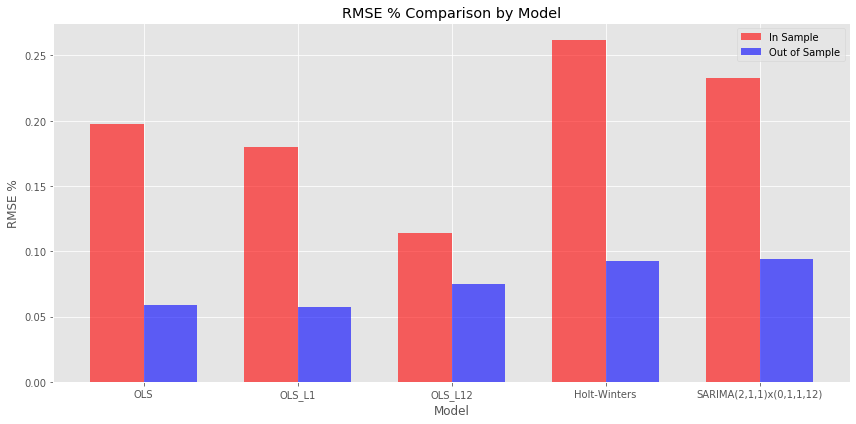

In [97]:
'''
Adapted from https://pythonspot.com/matplotlib-bar-chart/
'''
fig, ax = plt.subplots()
index = np.arange(5)
bar_width = 0.35
opacity = 0.6

in_sample = (rmse1_in, rmse2_in, rmse3_in, rmse4_in, rmse5_in)
out_sample = (rmse1_out, rmse2_out, rmse3_out, rmse4_out, rmse5_out)

rects1 = plt.bar(index, in_sample, bar_width,
                alpha=opacity,
                color='r',
                label='In Sample')

rects2 = plt.bar(index + bar_width, out_sample, bar_width,
                alpha=opacity,
                color='b',
                label='Out of Sample')

plt.xlabel('Model')
plt.ylabel('RMSE %')
plt.title('RMSE % Comparison by Model')
plt.xticks(index + (bar_width/2), ('OLS','OLS_L1', 'OLS_L12', 'Holt-Winters', model_specs))
plt.legend()

plt.tight_layout()
plt.show()

For purposes of this study, we recommend that the Bank implement a __linear seasonal model, integrating the most recent transaction__ to monitor monthly transactions.

We chose to go with monthly and daily data. Compared with hourly data, we were able to better fit out models to daily data. Monthly data demonstrates a clear seasonal pattern, allowing us to fit seasonal models.

Furthermore, given the manual nature involved in recording and validating transactions, a monthly monitoring system would ensure the Bank has the resources and time capacity to complete thorough AML checks for each of its clients before deciding to take any action on flag clients.

## Recommended Workflow

<ol>
    <li> Create and fit a model </li>
    <li> Create predictions for future transactions</li>
    <li> Compute the 95% prediction interval for future transactions</li>
    <li> If a new transaction is outside the interval, we mark it as suspect</li>
</ol>